In [1]:
pip install mlxtend


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml


In [3]:
scanner = pd.read_csv("scanner data.csv")
scanner.head(8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TransactionID  Product
0           1405    Bread
1           6144  Bananas
2           6144     Milk
3           6144    Pasta
4           7669  Chicken
5           7669    Bread
6           8183  Bananas
7           8183    Pasta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bread'),
  Text(1, 0, 'Pasta'),
  Text(2, 0, 'Bananas'),
  Text(3, 0, 'Tomatoes'),
  Text(4, 0, 'Beef'),
  Text(5, 0, 'Milk'),
  Text(6, 0, 'Rice'),
  Text(7, 0, 'Cheese'),
  Text(8, 0, 'Apples'),
  Text(9, 0, 'Chicken')])

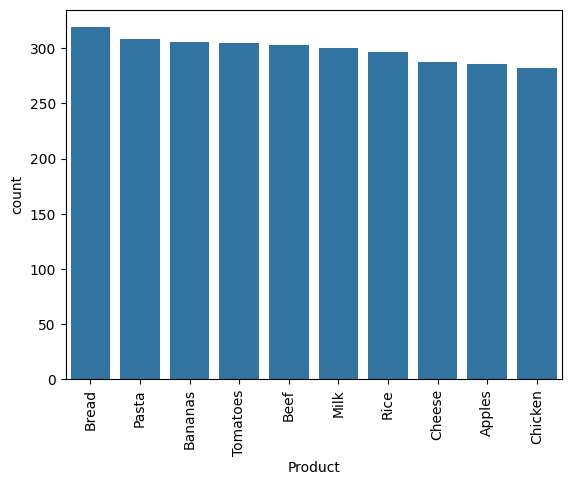

In [4]:
sns.countplot(x = 'Product', data = scanner, order = scanner['Product'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)


In [5]:
df = scanner.groupby(['TransactionID','Product']).size().reset_index(name='count')
basket = (df.groupby(['TransactionID', 'Product'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:

frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


antecedents consequents  antecedent support  \
978      (Beef, Apples, Bread)      (Rice)            0.030720   
1718   (Tomatoes, Beef, Bread)      (Rice)            0.034958   
1911  (Tomatoes, Pasta, Bread)      (Rice)            0.034958   
1997    (Pasta, Rice, Chicken)  (Tomatoes)            0.030720   
1803       (Beef, Pasta, Rice)  (Tomatoes)            0.031780   
1801   (Tomatoes, Pasta, Beef)      (Rice)            0.031780   
1653     (Rice, Bread, Cheese)      (Beef)            0.029661   
1037     (Beef, Pasta, Apples)  (Tomatoes)            0.025424   
981      (Apples, Bread, Rice)      (Beef)            0.033898   
908   (Tomatoes, Milk, Apples)   (Bananas)            0.027542   

      consequent support   support  confidence      lift  leverage  \
978             0.311441  0.016949    0.551724  1.771522  0.007382   
1718            0.311441  0.019068    0.545455  1.751391  0.008181   
1911            0.311441  0.019068    0.545455  1.751391  0.008181   
1997            0.314619  0.015890    0.517241  1.644026  0.006225   
1803            0.314619  0.015890    0.500000  1.589226  0.005891   
1801            0.311441  0.015890    0.500000  1.605442  0.005992   
1653            0.318856  0.014831    0.500000  1.568106  0.005373   
1037            0.314619  0.012712    0.500000  1.589226  0.004713   
981             0.318856  0.016949    0.500000  1.568106  0.006140   
908             0.320975  0.013771    0.500000  1.557756  0.004931   

      conviction  zhangs_metric  
978     1.536017       0.449317  
1718    1.514831       0.444566  
1911    1.514831       0.444566  
1997    1.419719       0.404153  
1803    1.370763       0.382932  
1801    1.377119       0.389497  
1653    1.362288       0.373362  
1037    1.370763       0.380435  
981     1.362288       0.375000  
908     1.358051       0.368192